## Homework 2 - Model Selection and Regularization
In this homework, we will explore the need for regularization and cross validation. Your goal is to determine
the *true* model that exists in this superfluous data set. 

Just a quick reminder on how to submit homework solutions:
    
``` $ git add myhomeworksolutions.ipynb ```

``` $ git commit -m "added my homework 1 solutions" ```

``` $ git push origin master $ ```

Run the cell below to load the libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Problem 1: Not So Nearest Neighbors

In this problem we look into the **curse of dimensionality**  (https://en.wikipedia.org/wiki/Curse_of_dimensionality).

Recall from lecture that when solving the ordinary least squares, the solution to 

$$\min_f \mathbb{E}_{y \lvert x} (y - f(x))^2,$$

is $$ f(x) = \mathbb{E}(y \lvert x).$$


As usual though, we only have access to the sampled data $(\mathbf{x}_i, y_i)$. Thus we seek to find (as seen in lecture)

$$ \hat f(x) :=  \hat{\mathbb{E}}(y \lvert x).$$

The simple approach which is the most natural way to estimate $f$ is to average $y_i$ over over observations $x_i$ such that $x_i=x$

$$ \hat{\mathbb{E}}(y \lvert x) = \frac{1}{N_{x_i=x}} \sum_{x_i, x_i=x} y_i,$$

where $N_{x_i=x}$ is the number of points such that $x_i=x$. **But we cannot do this since we only have access to the training data, not all $x$, and we generally have at most one instance of each $x_i$**. Thus we settle for

$$ \hat{\mathbb{E}}(y \lvert x) := \frac{1}{k} \sum_{x_i \in N_k(x)} y_i,$$

where $N_k(x)$ denotes the set of the $k$ closest points to $x$. 

### Goal of this problem:
To understand how the set $N_k(x)$ behaves as we increase the dimension. The intuition is that it's much harder to find points close to $x$ as we increase the *degrees of freedom* of our samples. We will see that this means we have to search larger distances to find these points, and these points may not reflect the value of $y_i$ well at all!

**[15 points]** a) Run the code below to create a sample from a $p$ dimensional uniform distribution, denoted $\mathcal{U}(-1,1)^p$.  



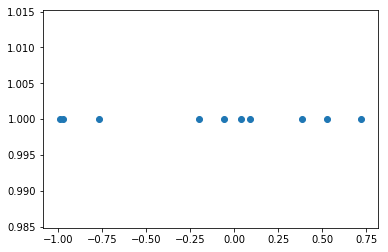

In [2]:
p=1
X=np.zeros(shape=(10,p))
for k in range(X.shape[1]):
    X[:,k] = np.random.uniform(-1,1,10)
plt.scatter(X[:,k] ,[1]*10)

What is the distance of $x=0$ to its nearest neighbor? You can use `np.min` and `np.abs` here. 

Repeat the above but now for $p=2$ and make a scatter plot on $[-1,1] \times [-1,1]$. Use `X=np.zeros(shape=(10,p))` to initialize the matrix, and make sure that each row is a point sampled from a 2d uniform distribution (you can do this by setting each column to be sampled from a 1d uniform distribution). 

Finally, repeat the problem for various values of $p$, ($p=10,20,100$, etc. ). What do you notice about the distances? Can you explain why this may be happening?


In [3]:
print("The distance of x=0 to its nearest neighbor is:", np.min(np.abs(X - 0)))

The distance of x=0 to its nearest neighbor is: 0.038718863260758685


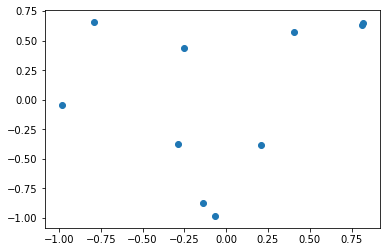

In [4]:

p=2
X2=np.zeros(shape=(10,p))
for k in range(X2.shape[1]):
    X2[:,k] = np.random.uniform(-1,1,10)
plt.scatter(X2[:,0], X2[:,1])

In [5]:
from scipy.spatial import distance

zero=np.zeros(shape=(10,2))
dist = distance.cdist(X2,zero).min(axis=1)
print("The distance of x=0 to its nearest neighbor in 2d is:", min(dist))

The distance of x=0 to its nearest neighbor in 2d is: 0.433039109115797


In [6]:
def min_pdim(p):

    X=np.zeros(shape=(10,p))
    for k in range(X.shape[1]):
        X[:,k] = np.random.uniform(-1,1,10)
    
    zero=np.zeros(shape=(10,p))
    dist = distance.cdist(X,zero).min(axis=1)
    min_dist = np.min(dist)
    
    return min_dist

Text(0, 0.5, 'distance')

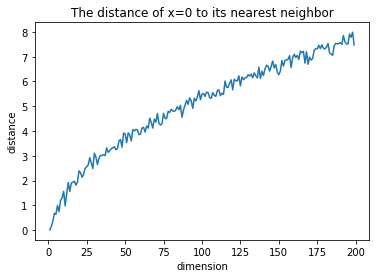

In [7]:
p = np.arange(1,200)
dist_list = []
for i in p:
    dist_list.append(min_pdim(i))
    
plt.plot(p, dist_list)
plt.title("The distance of x=0 to its nearest neighbor")
plt.xlabel('dimension')
plt.ylabel('distance')

**Comment** The distance increaces as the dimensinality of space increace. The increasing speed of data can grow as fast as the increasing speed of the space, hence the distance will increase in a different rate as a result.

**[10 points]** b)  Let's do something more precise to find out what's happening. Assume that there are $N$ points which are uniformly distributed in a sphere in $\mathbb{R}^n$. Find the probabiltity that the nearest neighbor of the origin is at a distance larger than or equal to $r$ and show that it is

$$  P(y \geq R) = \left (1- r^p\right)^N.$$

You can assume the volume of the sphere in $\mathbb{R}^p$ is $C_pr^p$. 

**Hint:** First find the proability that given one point, that it is not within a ball of radius $r$ centered around the origin. Then use independence to find the case when there are $N$ points. 

**Solution:** $$P(x_i\geq R)=1-P(x_i<R)$$

$$=1-\frac{C_pr_P}{C_p}=1-r_P$$

$$P(y≥R)=P(x1≥R)P(x2≥R)...P(xN≥R)=(1−r_p)^N$$

**[5 points]** c) Given your solution to part a), what is the median of the above distribution? 

**Solution:**The nearest neighbor.

**[5 points]** d)  Make a plot of $(p, P(y \geq 1/2))$ for  $N=50$. What happens as $p \to +\infty$ for fixed $N$? (ie. the number of poitns is fixed, but the dimension tends to $+\infty$). What does this tell you? In other words, where are all of the points accumulating?

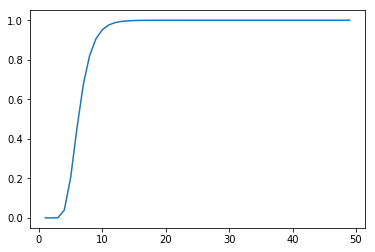

In [8]:
p = np.arange(1,50)
N = 50
prob = (1 - (1/2)**p)**N
    
plt.plot(p, prob)

** [2 points] ** e) Run the code in the cell below. The second cell computes the nearest neighbors regressor for this data. 

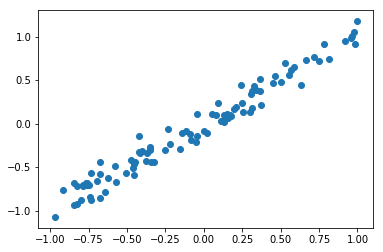

In [9]:
%matplotlib inline
X = np.random.uniform(-1,1,100)
epsilon = np.random.normal(0,0.1,100)
y = X + epsilon
plt.scatter(X,y)

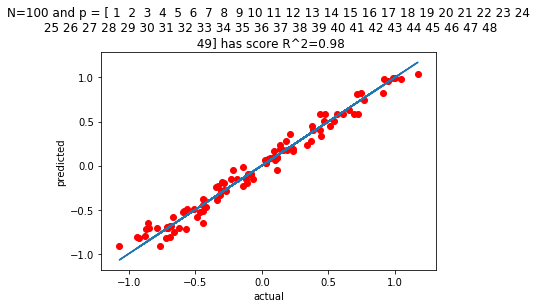

In [10]:
T = np.linspace(-1,1,1000)
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X.reshape(-1,1), y) 

y_hat = neigh.predict(X.reshape(-1,1))
r2 = round(neigh.score(X.reshape(-1,1),y),2)

plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("N=100 and p = {0} has score R^2={1}".format(p,r2))
plt.plot(y,y)
plt.scatter(y,y_hat,color='r')

**[10 points]** f) Repeat the above but for larger dimensions $p=10, 50, 100, 500$ so that the $N$ points are sampled from $\textrm{Unif}[-1,1]^p$ What happens to the scatter plot of predictions vs true values as the dimension increases? What happens to the $R^2$? Can you explain this in terms of your conclusions from the previous parts a) - c)?

In [11]:
def p_dimension_X(p):
    np.random.seed(42)
    
    X=np.zeros(shape=(100,p))
    epsilon=np.zeros(shape=(100,p))
    for k in range(X.shape[1]):
        X[:,k] = np.random.uniform(-1,1,100)
        epsilon[:,k] = np.random.normal(0,0.1,100)
    y = X + epsilon
    
    neigh = KNeighborsRegressor(n_neighbors=2)
    neigh.fit(X, y) 
    
    y_hat = neigh.predict(X)
    r2 = round(neigh.score(X,y),2)

    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.title("N=100, p = {0}, R^2={1}".format(p,r2))
    plt.plot(y,y)
    plt.scatter(y,y_hat,color='r')
    plt.show()

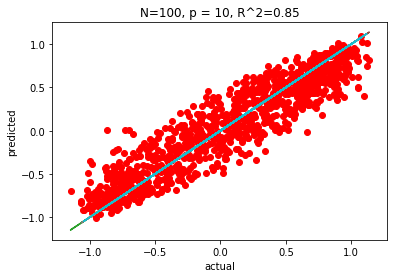

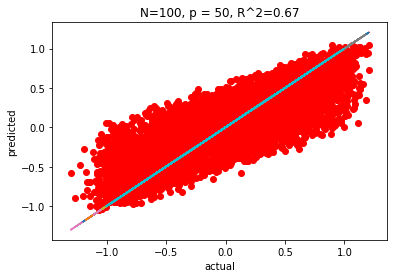

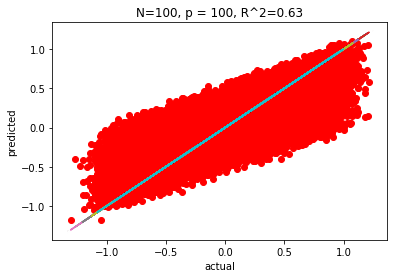

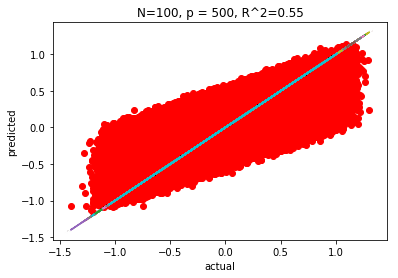

In [12]:
p = [10, 50, 100, 500]
for dim in p:
    p_dimension_X(dim)

**Solution:** As the dimension increases, the predictions and true values increases less. Moreover, R^2 is also decreacing.

Once again, modeling the data becomes more difficult because the dimensionality increaces which would make the data become more sparse.
Hence we are not able to do the similar training.

## Problem 2: Manual Model Selection

In this exercise, we have data which is sampled from a distribution which takes the form:
 $$y = \beta^T \cdot x + \epsilon.$$
 
 We are not told in advance what $\beta$ is though. That's up to you to discover. 

**[5 points]** a) Load the data `regularization_hw.csv` into a Pandas dataframe located in `data/` in the course repository. Set $X$ to be the variables $0, \cdots, 50$ and $y$ to be the $y$ variable. 

In [13]:
df = pd.read_csv("hw3.csv")
X = df.iloc[:,0:50]
y = df['y']

**[5 points]** b) Compute the covariance matrix of $X$ (ie. $X^TX$). What does this tell you about the features?

In [14]:
X.T.dot(X)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,-6.796716e-17,-1.388724e-16,-4.852363e-16,-4.786271e-16,3.200699e-16,-3.459937e-16,3.911572e-17,-4.011457e-16,-3.375371e-16,...,-1.006831e-16,2.494535e-16,-5.669516e-17,7.324731e-17,-3.831182e-16,1.825750e-16,-1.910029e-16,1.503145e-16,-3.367268e-17,2.362967e-16
1,-6.796716e-17,1.000000e+00,-1.664632e-16,3.762654e-16,-1.968781e-16,6.597226e-17,-4.705174e-17,-4.568235e-17,-3.477313e-16,-2.643844e-16,...,5.115636e-17,-6.162148e-17,-1.847156e-16,8.756882e-17,-3.495575e-17,2.520885e-17,-5.234542e-17,2.993724e-17,-8.457725e-17,-4.378128e-17
2,-1.388724e-16,-1.664632e-16,1.000000e+00,3.087921e-16,-1.185127e-16,-8.061816e-17,-1.542485e-16,6.838618e-17,4.375210e-17,1.647512e-16,...,2.768245e-17,1.636411e-16,-1.214423e-16,3.306010e-16,1.370105e-16,-2.634191e-17,1.126896e-17,3.862241e-16,-2.348881e-17,6.005145e-17
3,-4.852363e-16,3.762654e-16,3.087921e-16,1.000000e+00,4.757150e-16,3.503701e-18,2.875758e-16,3.358678e-17,-7.245752e-17,-2.094831e-16,...,3.434164e-17,-1.404982e-16,2.103349e-16,-3.544740e-16,9.882625e-17,8.694619e-17,3.293776e-17,-1.378419e-16,5.886061e-18,-1.967988e-16
4,-4.786271e-16,-1.968781e-16,-1.185127e-16,4.757150e-16,1.000000e+00,-1.854967e-16,-6.614286e-17,3.533050e-17,-4.065052e-16,3.929117e-16,...,-2.544070e-17,1.165596e-16,-1.319565e-16,1.493340e-16,-1.980841e-16,-2.856708e-16,1.273270e-16,2.877714e-16,1.641144e-16,1.702177e-16
5,3.200699e-16,6.597226e-17,-8.061816e-17,3.503701e-18,-1.854967e-16,1.000000e+00,2.006672e-16,1.191399e-16,-2.821536e-17,6.214118e-17,...,-1.881522e-16,1.479244e-17,5.043686e-17,-1.106949e-16,5.829765e-17,-1.383884e-16,8.730097e-17,-1.804153e-16,7.563586e-17,-7.506028e-17
6,-3.459937e-16,-4.705174e-17,-1.542485e-16,2.875758e-16,-6.614286e-17,2.006672e-16,1.000000e+00,1.681046e-16,-3.179430e-18,-2.450568e-16,...,2.056913e-16,4.227936e-16,1.996306e-16,8.835951e-17,-1.676942e-16,-1.088925e-16,-2.577011e-16,-7.974163e-18,-8.121897e-17,2.753575e-16
7,3.911572e-17,-4.568235e-17,6.838618e-17,3.358678e-17,3.533050e-17,1.191399e-16,1.681046e-16,1.000000e+00,1.778133e-16,2.627395e-16,...,1.442414e-16,1.095239e-17,1.380004e-16,1.429315e-16,-2.550792e-17,1.171461e-16,-2.178825e-17,-2.363458e-16,-1.805108e-16,-3.025633e-16
8,-4.011457e-16,-3.477313e-16,4.375210e-17,-7.245752e-17,-4.065052e-16,-2.821536e-17,-3.179430e-18,1.778133e-16,1.000000e+00,-1.975277e-16,...,-1.627617e-16,4.249234e-17,1.511168e-16,2.332324e-16,-2.198323e-16,-1.806768e-16,-6.480257e-17,-1.667052e-16,1.100605e-16,3.741004e-18
9,-3.375371e-16,-2.643844e-16,1.647512e-16,-2.094831e-16,3.929117e-16,6.214118e-17,-2.450568e-16,2.627395e-16,-1.975277e-16,1.000000e+00,...,-2.425278e-17,5.283437e-17,1.310055e-16,-1.797993e-16,1.372634e-16,-5.080592e-17,-3.002779e-17,-5.301399e-17,-2.573895e-17,1.337791e-17


**Comment:** It seems that all features are not correlated too much.

**[10 points]** c) Starting $k$ from 1 and ranging to 50 (the total number of features), build a linear regression model  for $X[:,0:k]$ (where this denotes the matrix restricted to the first k columns), and plot the predictions against the actual values.  What happens as the number of features included increases? Why is this not surprising given what you know about linear alegbra and part b)? Recalling Homework 0 Problem 2 may be helpful. 

The following code will be useful:

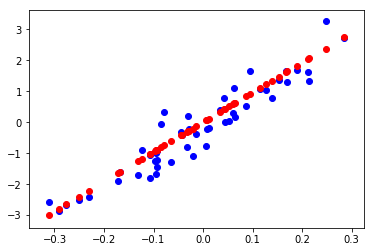

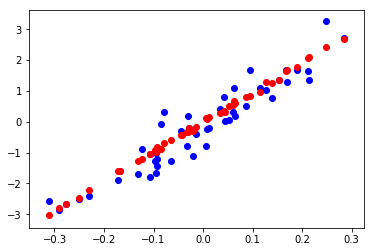

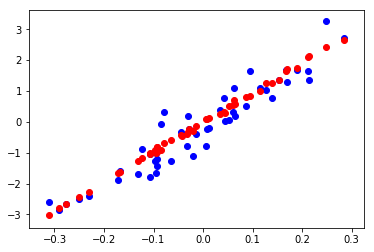

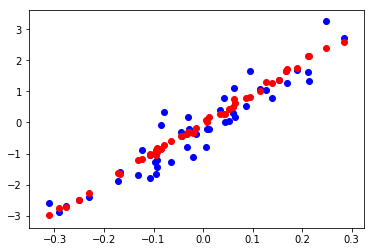

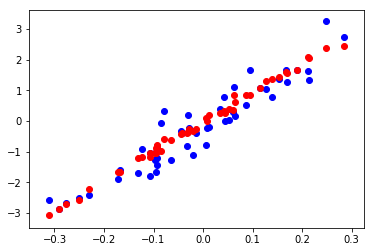

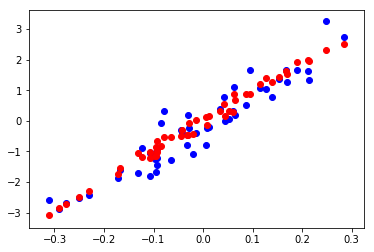

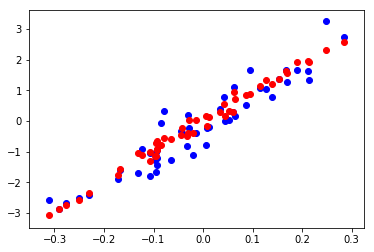

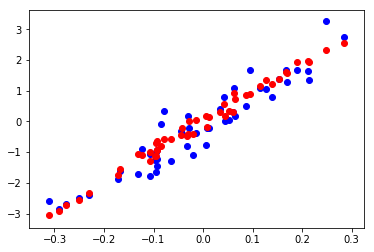

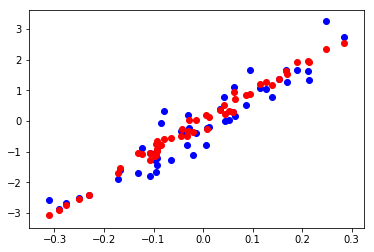

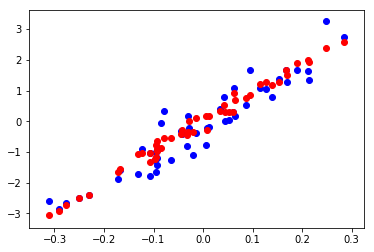

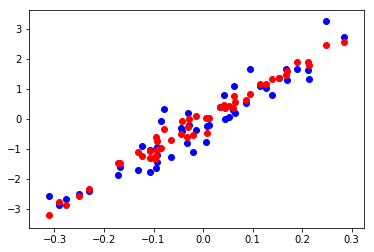

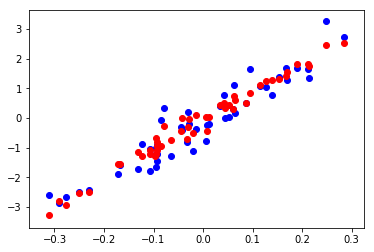

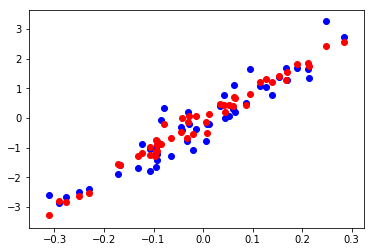

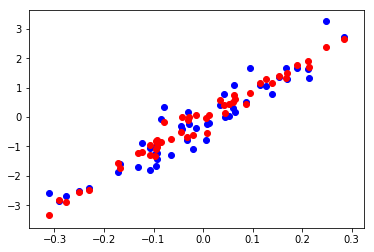

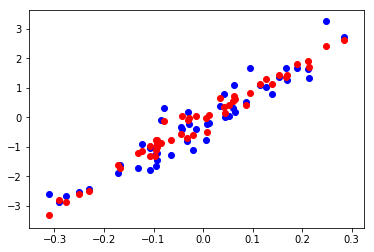

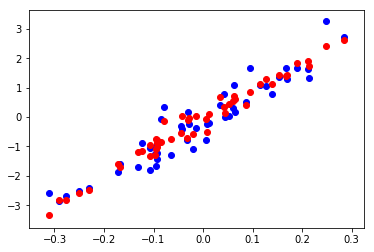

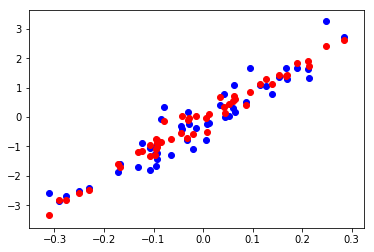

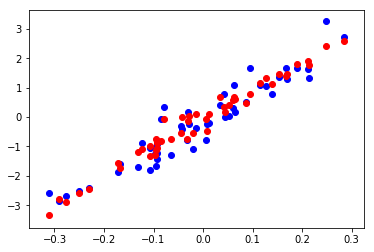

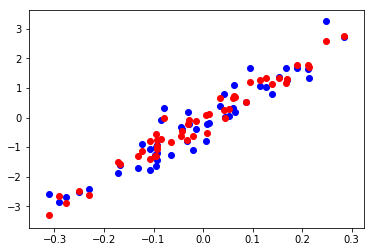

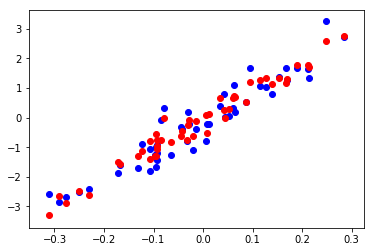

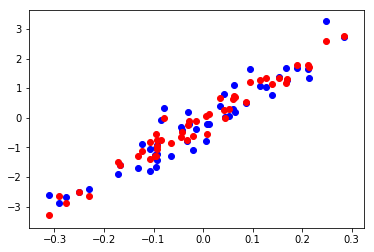

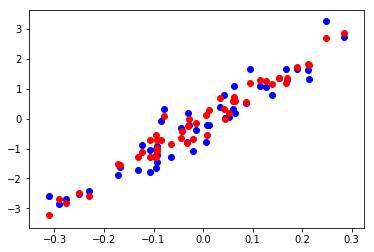

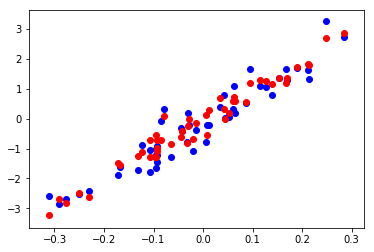

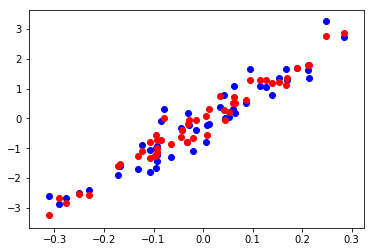

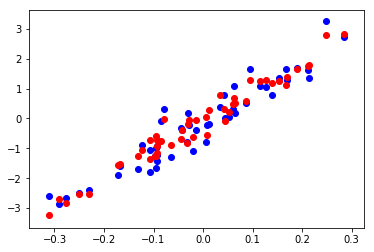

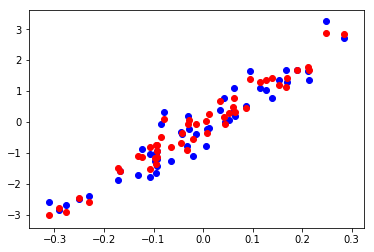

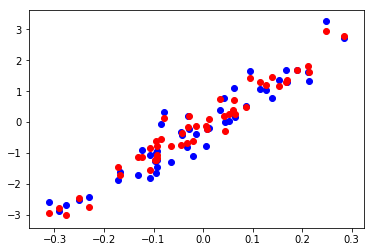

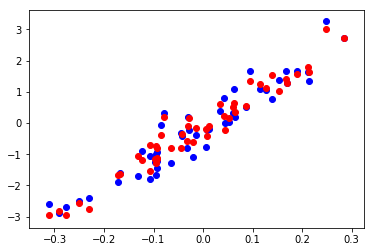

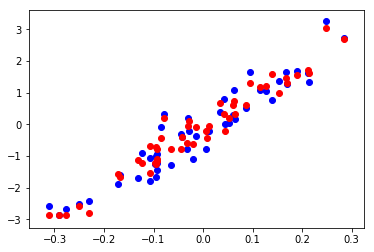

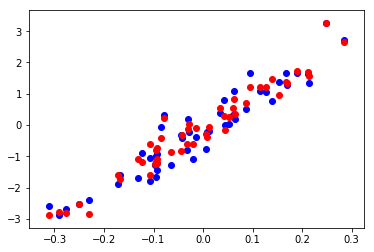

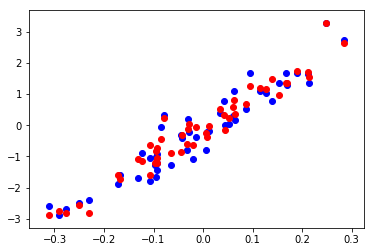

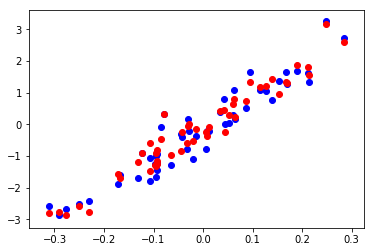

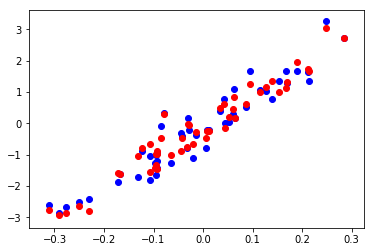

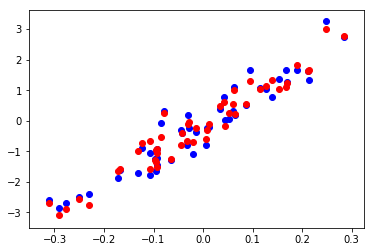

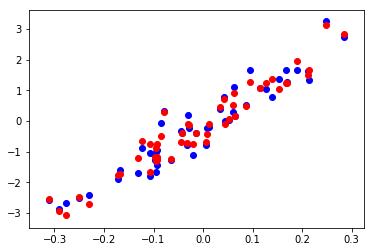

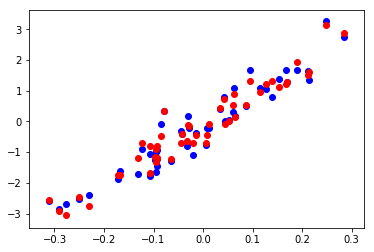

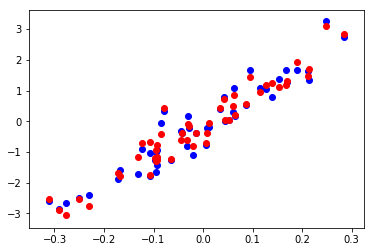

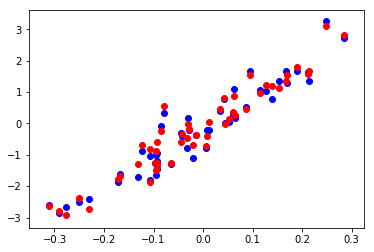

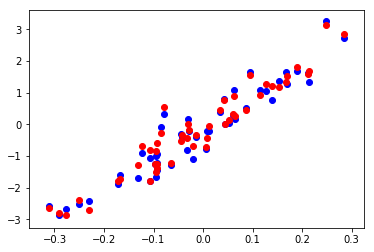

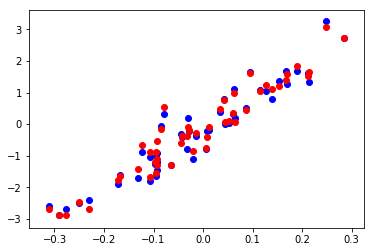

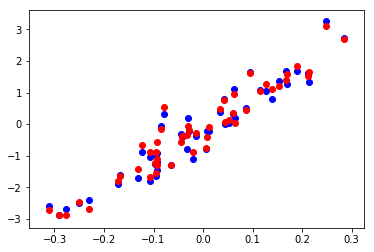

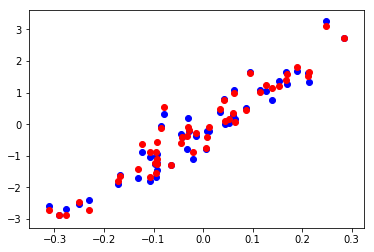

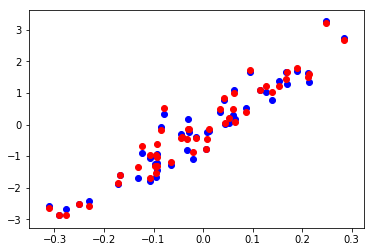

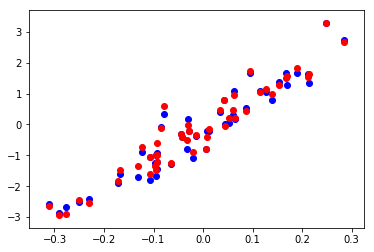

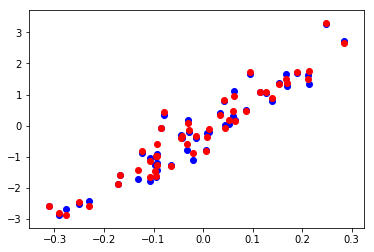

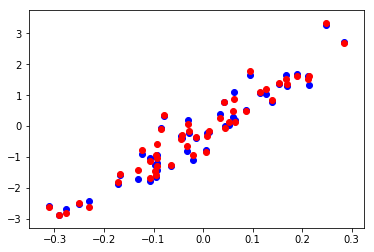

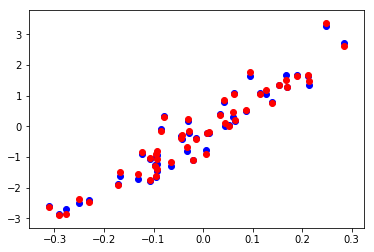

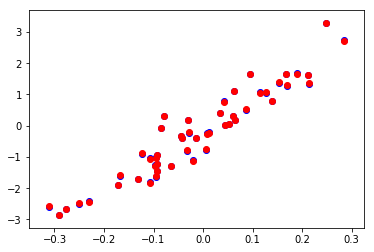

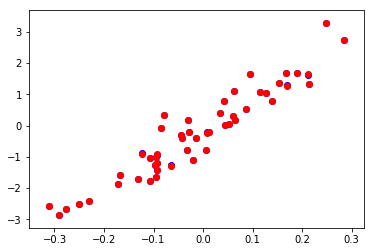

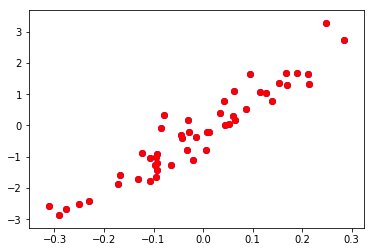

In [15]:
from sklearn import datasets, linear_model

for d in range(0,50):
    
    X=df.loc[:,'0':str(d)]
    regr = linear_model.LinearRegression(fit_intercept=False)
    regr.fit(X,y)
    y_pred = regr.predict(X)
    
    plt.scatter(X.loc[:,'0':str(0)],y,color='b')
    plt.scatter(X.loc[:,'0':str(0)],y_pred,color='r')
    plt.show()

**Comment:** As the number of features included increaces,the estimated values will close to the actual values more until they overlap completely.

Underfitting $\to$ Well fitting $\to$ Overfitting.

X is almost orthogonal, we have a unique non-trivial solution so that we can solve it excatly.The variance explained by the model increases and the model fits data better.

** [10 points] ** d) Split the data randomly into 80% training and 20% testing using `test_train_split` in Python. Repeat part c) on the training data, and
plot the $R^2$ of the model on the training and testing data against the number of features used. What happens to the training and testing error as you do this?

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

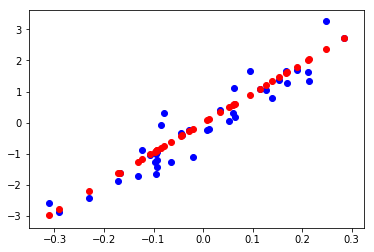

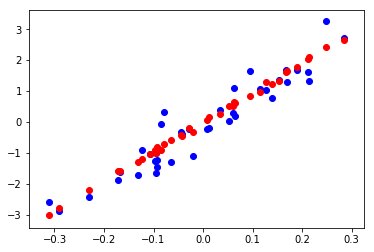

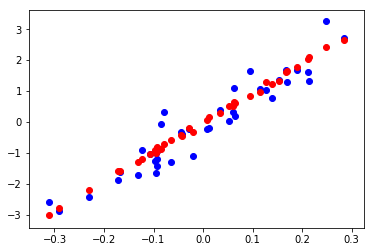

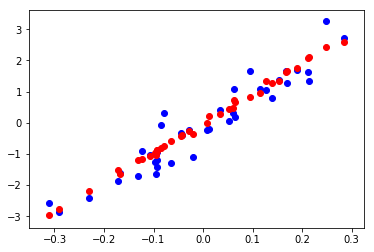

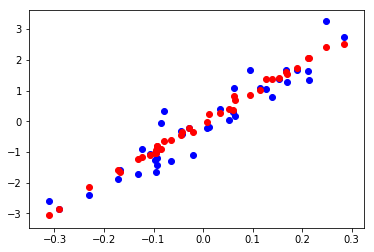

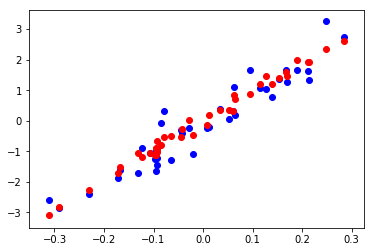

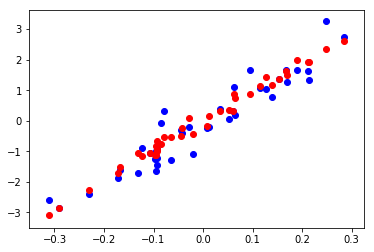

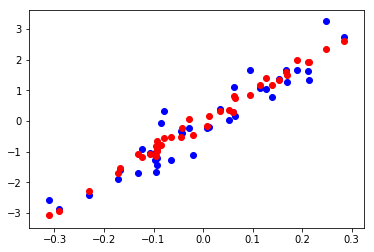

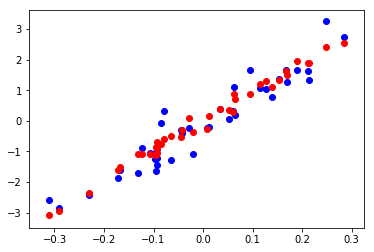

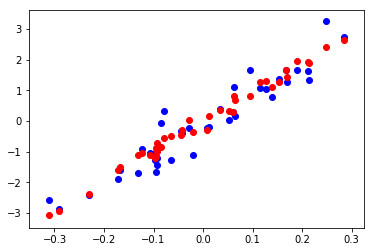

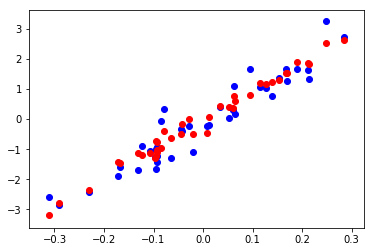

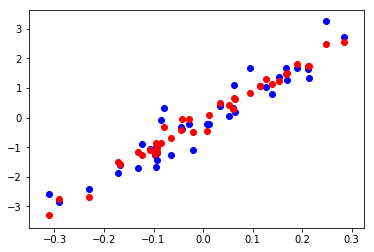

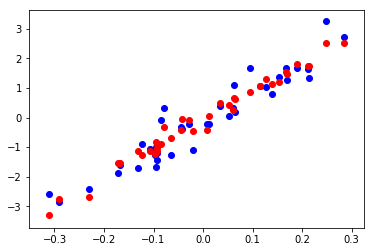

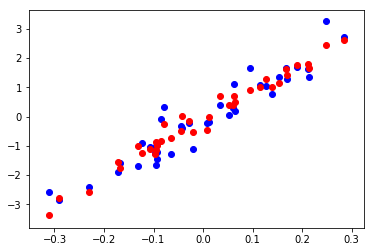

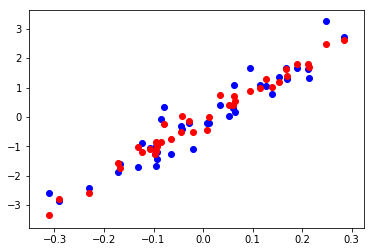

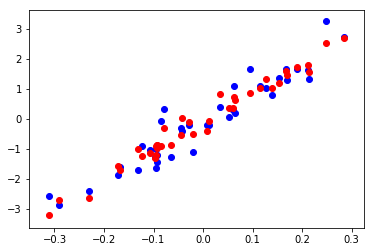

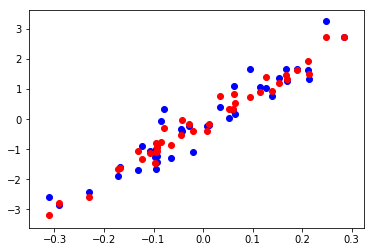

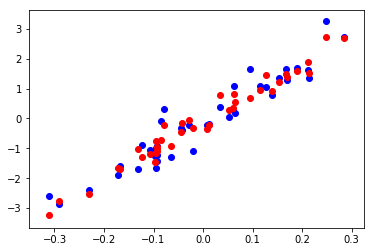

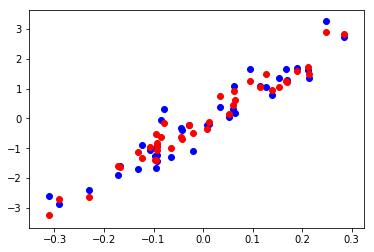

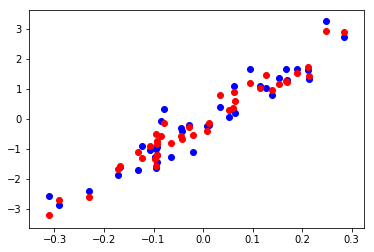

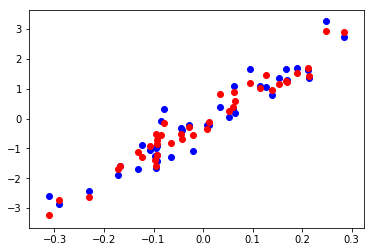

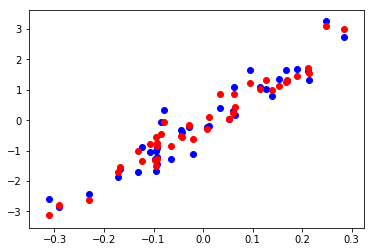

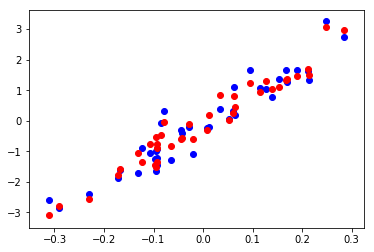

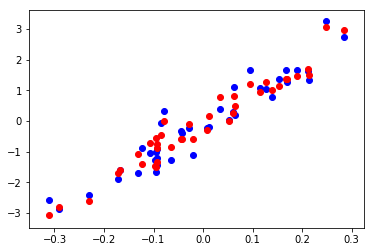

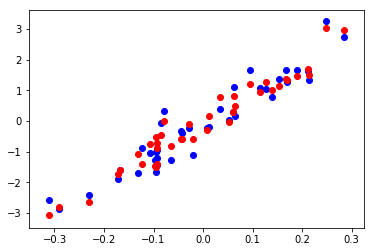

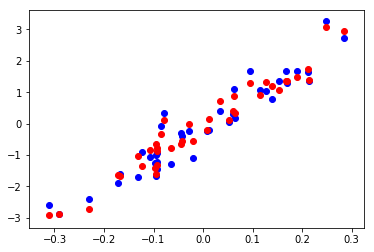

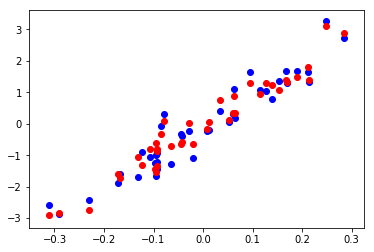

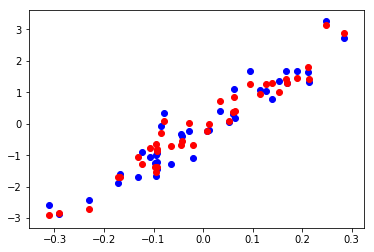

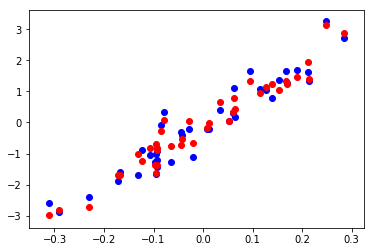

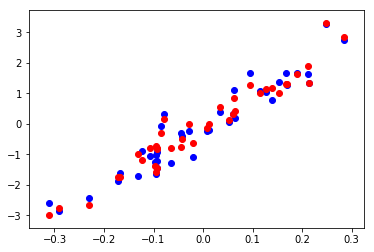

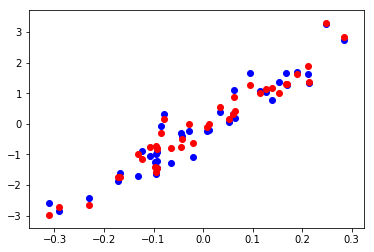

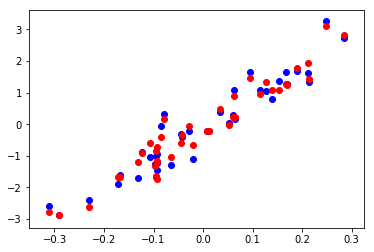

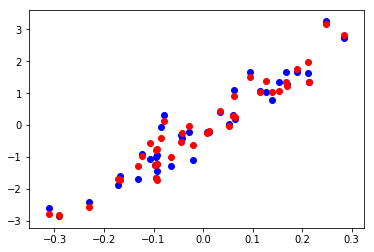

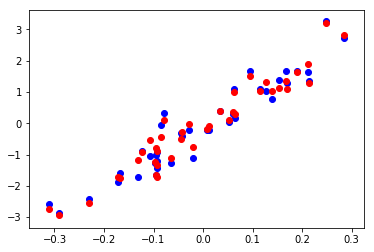

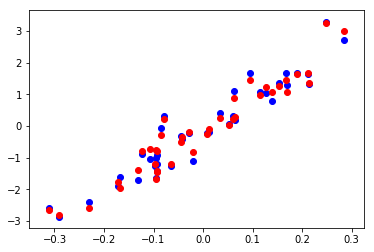

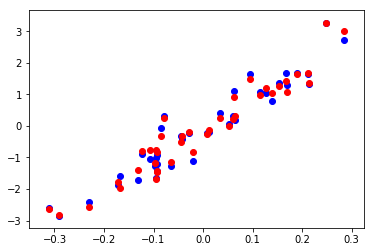

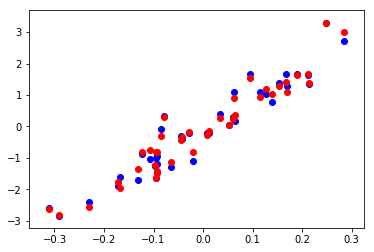

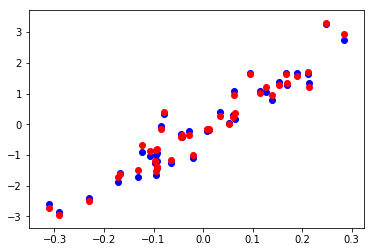

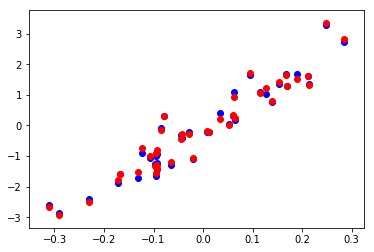

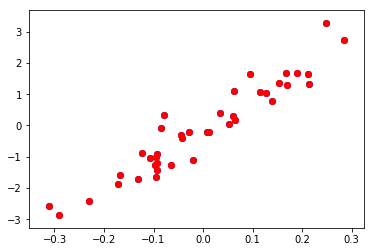

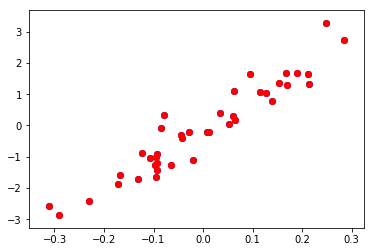

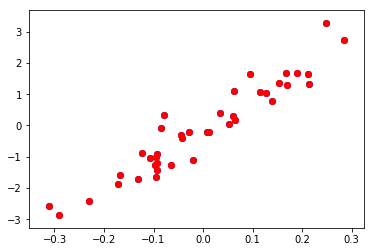

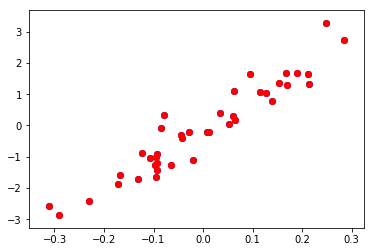

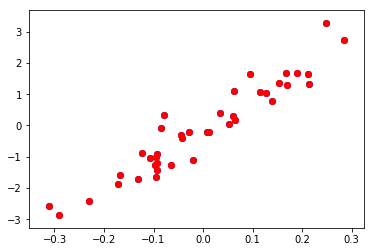

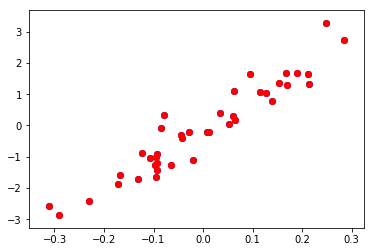

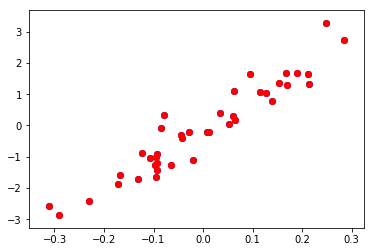

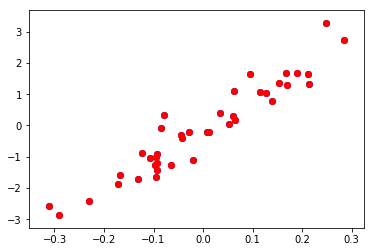

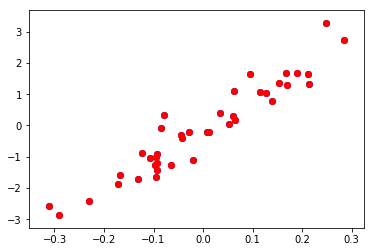

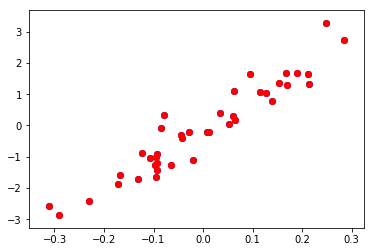

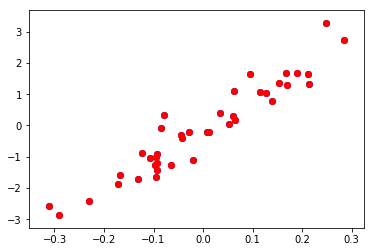

In [17]:
for d in range(0,50):
    Xtrain_reduce=X_train.loc[:,'0':str(d)]
    regr = linear_model.LinearRegression(fit_intercept=False)
    regr.fit(Xtrain_reduce,y_train)
    y_pred = regr.predict(Xtrain_reduce)
    
    plt.scatter(Xtrain_reduce.loc[:,'0':str(0)],y_train,color='b')
    plt.scatter(Xtrain_reduce.loc[:,'0':str(0)],y_pred,color='r')
    plt.show()

Text(0, 0.5, 'R^2 for Training Data')

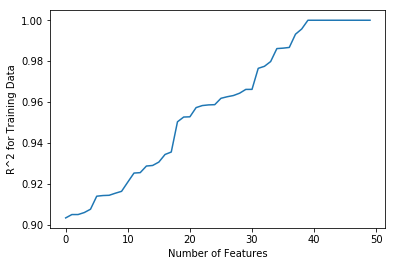

In [18]:
from sklearn.metrics import r2_score
dim = np.arange(0,50)
r2_train = []
r2_test = []

for d in range(0,50):
    
    X_train_d = X_train.loc[:,'0':str(d)]
    # Train the model here using regr = linear_model.LinearRegression(fit_intercept=False)
    regr = linear_model.LinearRegression(fit_intercept=False)
    regr.fit(X_train_d,y_train)
    y_train_pred = regr.predict(X_train_d)
    
    X_test_d = X_test.loc[:,'0':str(d)]
    y_test_pred = regr.predict(X_test_d)
    
    r2_train.append(r2_score(y_train,y_train_pred))
    r2_test.append(r2_score(y_test,y_test_pred))    

    
plt.plot(dim,r2_train)
plt.xlabel("Number of Features")
plt.ylabel("R^2 for Training Data")
    

Text(0, 0.5, 'R^2 for Testing Data')

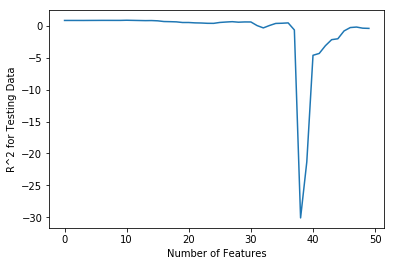

In [19]:
plt.plot(dim, r2_test)
plt.xlabel("Number of Features")
plt.ylabel("R^2 for Testing Data")

**Comment:** As the number of features used increases, R^2 of the model on the training data increases and training error decreases.

However, R^2 of the model on the testing data is low and negative value occurs at some points. 

** [ 10 points] ** d) We would like to select the optimal subset of features which perform best on unseen data. If we were to evaluate all possible subsets of features out of $k$ features, what would the number of combinations be? Is this computationally feasible? 


**Hint:** What is the number of ways you can choose $m$ features out of $k$ total possible features? This is a common combinatorial expression. What happens when you sum this expression over $m$? The Theorem Statement of the Binomial Theorem here may be helpful: https://en.wikipedia.org/wiki/Binomial_theorem


**Solution:** $\binom{k}{0}+\binom{k}{1}+\binom{k}{2}+...+\binom{k}{k}=2^k$

This is not computationally feasible.

## Problem 3:  Ridge Regularization 

As an alternative approach, we can simply penalize the size of the coefficients in a way which minimizes our norm.

$$ \hat F_{\lambda}(\beta) :=  \|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2 + \lambda \|\beta\|_{L^2}^2. $$



**[5 points]** a) Do we need to scale our data in this case?

 **Comment:** If we are using L2 penalty, the algorithm would focus more on features with large value and ignore features with small value. Hence we are supposed to scale the data.

In [20]:
from sklearn import preprocessing
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
X_scaled = preprocessing.scale(X)

**[10 points]** b) 

Use our solution from class,

$$\beta_{\alpha} = (X^TX + \lambda I)^{-1}X^Ty$$

compute $\beta$ for an arbitrary value of $\alpha > 0$. 

In [21]:
alpha = 2
I = np.identity(50)
A = (X_scaled.T).dot(X_scaled) + alpha*I
Ainv = np.linalg.inv(A)
beta = Ainv.dot(X_scaled.T).dot(y)
beta

array([ 1.28292860e+00, -9.16930707e-03, -2.87181713e-03,  7.95943103e-03,
        4.44814605e-02, -1.17267615e-01,  6.55002717e-02,  2.39204401e-02,
       -2.11431794e-02,  5.50819460e-03, -6.12595852e-02, -2.45102064e-03,
        7.09713533e-02,  5.73037018e-02,  6.60414348e-02, -7.93738845e-03,
       -4.77586647e-03,  4.12197888e-02,  1.22779280e-01, -1.23636452e-02,
        1.96276115e-02,  1.15895103e-01,  3.56813825e-02, -1.23148511e-02,
        1.33856521e-02, -1.21296574e-01, -6.06620892e-02, -3.73622272e-02,
       -8.88320689e-02, -6.99259460e-02,  1.68199672e-02,  8.47731429e-02,
        3.60239192e-02,  6.52931157e-02, -1.03941786e-01, -6.91599732e-04,
        8.64866210e-02,  1.49917743e-01,  5.10775173e-02, -5.08811920e-02,
        9.02748813e-03, -4.00967160e-02,  6.88325225e-02,  8.18324721e-02,
        7.43953703e-03, -2.74687942e-02,  9.22431212e-02,  4.48783932e-03,
        1.21666306e-02,  3.00555270e-03])

**[10 points]** c) Now repeat a) using `sklearn`'s `Ridge` method. But time time, use `test_train_split` to seperate
into training and testing data. Then evaluate performance for different values of $\alpha$. Can you find an $\alpha$ which has the best performance? 

D:\anaconda\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Text(0, 0.5, '$R^2$ for Testing Data')

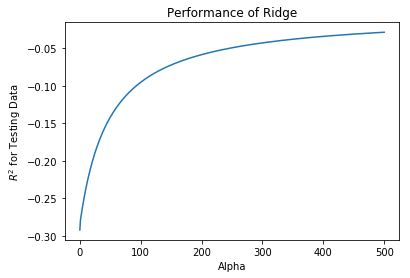

In [28]:
from sklearn.linear_model import Ridge
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X, y, \
                                                    test_size=0.2, random_state=2000)
X_train_ridge = preprocessing.scale(X_train_ridge)
X_test_ridge = preprocessing.scale(X_test_ridge)
alphas = np.linspace(0, 500, 501)
r2List = []
coefs = []

for a in alphas:
    regRidge = Ridge(alpha = a, fit_intercept=False) 
    regRidge.fit(X_train_ridge, y_train_ridge)
    y_test_pred = regRidge.predict(X_test_ridge)
    r2 = r2_score(y_test_ridge, y_test_pred)
    r2List.append(r2)
    coefs.append(regRidge.coef_.ravel())
    
plt.plot(alphas, r2List)
plt.title("Performance of Ridge")
plt.xlabel("Alpha")
plt.ylabel("$R^2$ for Testing Data")

In [24]:
print("The Best R^2 of Ridge:", round(max(r2List), 6))
print("Best Alpha of Ridge:", round(alphas[r2List.index(max(r2List))], 4))

The Best R^2 of Ridge: -0.028721
Best Alpha of Ridge: 500.0


**Comment:** The larger alpha works better.

**[10 points]** d) What do the coefficients look like for this optimal solution? You can answer this by plotting. Most importantly, do the maginitudes seem roughly comparable?

D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0, 0.5, '$R^2$ for Testing Data')

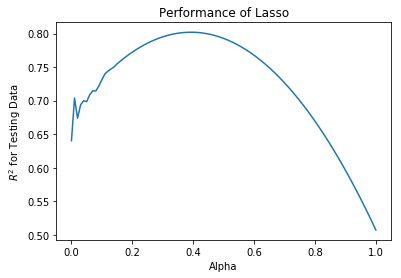

In [27]:
from sklearn.linear_model import Lasso
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled, y, \
                                                    test_size=0.2, random_state=37)
X_train_lasso = preprocessing.scale(X_train_lasso)
X_test_lasso = preprocessing.scale(X_test_lasso)
alphas = np.linspace(0, 1, 101)
r2List = []
coefs = []

for a in alphas:
    regLasso = Lasso(alpha = a, fit_intercept = False) 
    regLasso.fit(X_train_lasso, y_train_lasso)
    y_test_pred = regLasso.predict(X_test_lasso)
    r2 = r2_score(y_test_lasso, y_test_pred)
    r2List.append(r2)
    coefs.append(regLasso.coef_.ravel())
    
plt.plot(alphas, r2List)
plt.title("Performance of Lasso")
plt.xlabel("Alpha")
plt.ylabel("$R^2$ for Testing Data")

Text(0.5, 1.0, 'Coefficients with different alpha')

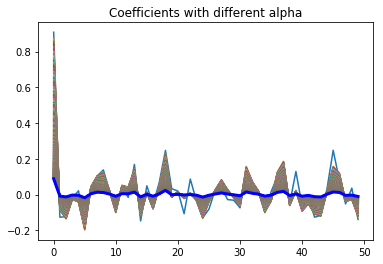

In [31]:
for i in range(len(coefs)):
    plt.plot(coefs[i], label = i)
plt.plot(coefs[-1], linewidth = 3, color = 'blue')
plt.title("Coefficients with different alpha")

**Comment:** The blue line represents the optimal coefficients.

Moreover, the maginitude seems roughly comparable.

## Problem 4: Lasso Reguarlization 

$$ \hat F_{\lambda}(\beta) :=  \|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2 + \lambda \|\beta\|_{L^1}, $$


a) Now repeat Problem 2 b) using `sklearn`'s `Lasso` method. How does the optimal performance seem to compare to that of `Ridge`? Ensure you are training on training data and evaluating on testing data. 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0, 0.5, '$R^2$ for Testing Data')

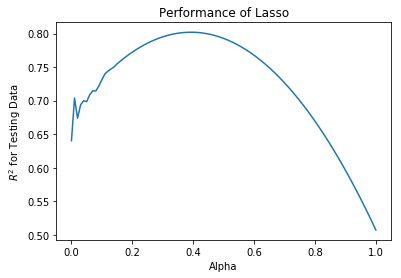

In [37]:
from sklearn.linear_model import Lasso
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled, y, \
                                                    test_size=0.2, random_state=37)
X_train_lasso = preprocessing.scale(X_train_lasso)
X_test_lasso = preprocessing.scale(X_test_lasso)
alphas = np.linspace(0, 1, 101)
r2List = []
coefs = []

for a in alphas:
    regLasso = Lasso(alpha = a, fit_intercept = False) 
    regLasso.fit(X_train_lasso, y_train_lasso)
    y_test_pred = regLasso.predict(X_test_lasso)
    r2 = r2_score(y_test_lasso, y_test_pred)
    r2List.append(r2)
    coefs.append(regLasso.coef_.ravel())
    
plt.plot(alphas, r2List)
plt.title("Performance of Lasso")
plt.xlabel("Alpha")
plt.ylabel("$R^2$ for Testing Data")

In [33]:
print("The Best R^2 of Lasso:", round(max(r2List), 6))
print("Best Alpha of Lasso:", round(alphas[r2List.index(max(r2List))], 4))

The Best R^2 of Lasso: 0.801917
Best Alpha of Lasso: 0.39


**Comment:** It looks much better than the case in Ridge.

First, we obtain the positive value. And then, we can observe that there is a best alpha.

b) What do the coefficients look like for the optimal $\lambda$ found above? How can you interpret this based on the level sets of $L^1$?

In [39]:
optimal = pd.DataFrame(coefs[r2List.index(max(r2List))])

Text(0.5, 1.0, 'Coefficients with different Lasso')

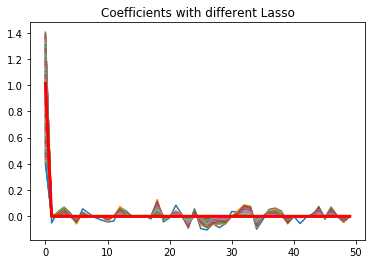

In [40]:
for i in range(len(coefs)):
    plt.plot(coefs[i], label = i)
plt.plot(optimal, linewidth = 3, color = 'red')
plt.title("Coefficients with different Lasso")

**Comment:** The optimal coefficients Lasso is the red line. We could observe that Lasso has turned some parameters into 0.

Since L1 shrinks the less important feature’s coefficient to zero thus, removing some feature altogether.